URL: https://github.com/lvankampenhout/BKG_emissies_NL <br>
Licensie: [Creative Commons BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)


# Inleiding

CO2 is het belangrijkste broeikasgas en Nederlandse CO2-emissies over de laatste 30 jaar zijn maar mondjesmaat afgenomen. In dit notebook kijk ik naar de vraag: zijn de doelen van de Klimaatwet en het Klimaatakkoord (49% reductie in 2030, 95% reductie in 2050) eigenlijk wel voldoende om te voldoen aan het [Akkoord van Parijs](https://nl.wikipedia.org/wiki/Akkoord_van_Parijs)? En zo nee, wat zou een eerlijker doel voor Nederland moeten zijn? 

Het concept *koolstofbudget* is hierbij enorm functioneel, omdat het namelijk niet draait om bepaalde doelen in bepaalde jaartallen maar om de cumulatieve uitstoot door de jaren heen. Het wereldwijde koolstofbudget is gedefineerd als de bovengrens aan cumulatieve toekomstige CO2-emissies die nog compatibel zijn met een bepaalde temperatuursdoelstelling. Het is geëigend om het koolstofbudget te gebruiken vanwege een bijna lineaire relatie tussen temperatuur en cumulatieve emissies (zie [Figuur 1b - Relatie temperatuurstijging en cumulatieve CO2-emissie](https://esb-external-prod.imgix.net/02bCMOIq6trNtBqF8rk02g-AEiI.png?cs=tinysrgb&w=1280); bron: PBL.) Voorts is bij het berekenen van het nationaal koolstofbudget voor Nederland het begrip *equity* van belang, ofwel *rechtvaardigheid*. In het Akkoord van Parijs wordt hier veelvuldig over gesproken, bijvoorbeeld in [Artikel 2.2](https://en.wikisource.org/wiki/Paris_Agreement#Article_2): 
>This Agreement will be implemented to reflect equity and the principle of common but differentiated responsibilities and respective capabilities, in the light of different national circumstances.

of in [Artikel 4.1](https://en.wikisource.org/wiki/Paris_Agreement#Article_4): 
> In order to achieve the long-term temperature goal set out in Article 2, Parties aim to reach global peaking of greenhouse gas emissions as soon as possible, recognizing that peaking will take longer for developing country Parties, and to undertake rapid reductions thereafter in accordance with best available science, so as to achieve a balance between anthropogenic emissions by sources and removals by sinks of greenhouse gases in the second half of this century, on the basis of equity, and in the context of sustainable development and efforts to eradicate poverty. 

Vrij vertaald: 'de sterkste schouders zullen de zwaarste lasten dragen'. Bovenstaande artikelen zijn echter dermate vaag geformuleerd dat er veel ruimte voor interpretatie overblijft. Het rekenen met nationale koolstofbudget is daarom geen exacte wetenschap, omdat keuzes in 'wat is eerlijk' de uitkomst in hoge mate bepalen. Daar gaat dit notebook ook deels over. Ik baseer mij verder op het (op dit moment meest recente) IPCC rapport uit 2018 waar mondiale koolstofbudgetten worden berekend - het [Special Report on Global Warming of 1.5 ºC](https://www.ipcc.ch/sr15/). In augustus 2019 schreef prof. Stefan Rahmstorf [hierover](http://www.realclimate.org/index.php/archives/2019/08/how-much-co2-your-country-can-still-emit-in-three-simple-steps/): 

> The bottom line, as one of the co-authors (Elmar Kriegler) told me, is that the SR15 estimates in the table above are still the best we have.

Het gaat in deze tabel alleen om cumulatieve CO2-uitstoot. Andere bronnen van opwarming als methaan, F-gassen, ontbossing etc. zullen elk ook teruggedrongen moeten worden, maar laat ik buiten beschouwing. De gebruikte informatiebron voor historische CO2-emissies in Nederland zijn de BKG-tabellen van de [Emissieregistratie](http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx) en het [Compendium voor de Leefomgeving](https://www.clo.nl/indicatoren/nl0165-broeikasgasemissies-in-nederland?ond=20883). 

Leo van Kampenhout<br>
oktober 2020

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [299]:
c_dict = {}
c_dict['hist'] = 'powderblue' # historical bar chart
c_dict['future'] = 'peachpuff' # future bar chart
c_dict['future2'] = 'sandybrown' # future bar chart
c_dict['edge'] = '#dddddd' # edge

# Deel 1 - Historische emissies in Nederland, en voorgenomen beleid

Emissiedata gedownload van <br>
https://www.clo.nl/indicatoren/nl0165-broeikasgasemissies-in-nederland?ond=20883 <br>
op 29 september 2020

In [524]:
df = pd.read_excel('c-0165-001g-clo-37-nl.xlsx',sheet_name='Emissie broeikasgassen',skiprows=5,index_col=0)

"""
2018 is het laatste jaar met *definitieve* data
""" 
df = df[df.index < 2020]
df.index = df.index.astype(int)
df.tail()

,Mton CO2-equivalenten,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
2015,166.818,18.202621,8.808214,2.044882,NaN,NaN,NaN
2016,166.733,18.329046,8.476745,1.903725,NaN,NaN,NaN
2017,164.898,18.012193,8.657644,1.761858,NaN,NaN,NaN
2018,160.611,17.308777,8.349118,1.928345,NaN,NaN,NaN
2019,155.239,17.015430,8.279345,2.000000,NaN,NaN,NaN


## Broeikasgas-emissies totaal (alle bronnen)

NB. een eerdere versie van dit notebook werkte hiermee. Dit was echter niet handig omdat dit niet 1-op-1 vergelijkt met Tabel 2.2 van IPCC SR15 met koolstofbudgetten, die alleen voor CO2 zijn. 

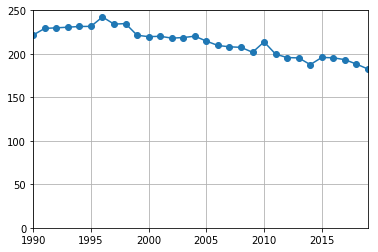

In [525]:
df_bkg_NL = df[df.columns[0:4]].sum(axis=1) # Broeikasgassen totaal, als op http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx
df_bkg_NL.plot(marker='o')
plt.ylim((0,250))
plt.grid()

Individuele waardes kunnen vergeleken worden met de website van [Emissieregistratie](http://www.emissieregistratie.nl/erpubliek/erpub/international/broeikasgassen.aspx), om te checken dat we hetzelfde berekend hebben. Let op: de waarde voor 2019 is nog voorlopig en kan afwijken.

In [526]:
df_bkg_NL[2019]

182.53345594557985

Reductie in 2019

In [527]:
jaar = 2019
print(f'Reductie jaarlijkse BKG emissies in {jaar} t.o.v. 1990 : {(1.0 - df_bkg_NL[2019] / df_bkg_NL[1990])*100:.1f} %')

Reductie jaarlijkse BKG emissies in 2019 t.o.v. 1990 : 17.7 %


Ter referentie, het 4e kabinet Balkenende uit 2007 had als doelstelling in het regeerakkoord had opgenomen om de totale emissies in 2020 gereduceerd te hebben met 30% t.o.v. 1990 (bron: [NRC](https://outline.com/8MyPLN)). Deze doelstelling is door latere kabinetten losgelaten. Het Urgenda-vonnis eist alsnog 25% reductie door de staat (bron: [Rijksoverheid](https://www.rijksoverheid.nl/actueel/nieuws/2020/04/24/kabinet-neemt-maatregelen-voor-extra-co2-reductie)). 

## Alleen CO2

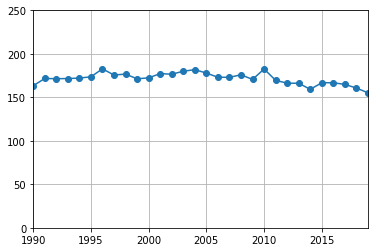

In [528]:
df_co2_NL = df[df.columns[0]] # alleen CO2
df_co2_NL.plot(marker='o')
plt.ylim((0,250))
plt.grid()

In [529]:
df_co2_NL[2019]

155.23868070728162

In [530]:
jaar = 2019
print(f'Reductie CO2 in {jaar} t.o.v. 1990 : {(1.0 - df_co2_NL[2019] / df_co2_NL[1990])*100:.1f} %')

Reductie CO2 in 2019 t.o.v. 1990 : 4.9 %


Vergelijken we deze 4,9% met de 17,7% hierboven, dan is duidelijk dat de reductie in totale broeikasgassen voornamelijk afkomstig is van reducties in andere broeikasgassen (F-gassen, N2O), en dat CO2 maar mondjesmaat afgenomen is.  

### Voorgenomen beleid (klimaatwet)
In de klimaatwet is vastgelegd dat emissies in 2030 met 49% worden gereduceerd, en in 2050 met 95%

Bron: https://www.energienieuws.info/2019/05/klimaatwet-aangenomen.html

Nu gaat dit om het totaal en broeikasgassen, en niet om CO2 specifiek. Maar zouden we dit één-op-één vertalen naar CO2, dan ziet dat er zo uit. 

In [531]:
# Doen we de aanname dat het 2020 doel van Urgenda wordt gehaald?
URGENDA = 0
emis_Urgenda = df_co2_NL[1990] * 0.75 # 25% reductie BROEIKASGASSEN TOTAAL in 2020 t.o.v. 1990
print(f'Emissies NL in 2020: {emis_Urgenda:.1f} Mton')

Emissies NL in 2020: 122.5 Mton


In [532]:
emis_NL_2030 = 0.51 * df_co2_NL[1990]
emis_NL_2050 = 0.05 * df_co2_NL[1990]

if (URGENDA):
    df = pd.Series(index=np.arange(2020,2051))    
    df[2020] = emis_Urgenda
    urgenda_str = 'met Urgenda'
else:
    df = pd.Series(index=np.arange(2019,2051))
    df[2019] = df_co2_NL[2019]
    urgenda_str = 'zonder Urgenda'

df[2030] = emis_NL_2030
df[2050] = emis_NL_2050

df[df.index[-1]] = 0
df_beleid = df.interpolate()

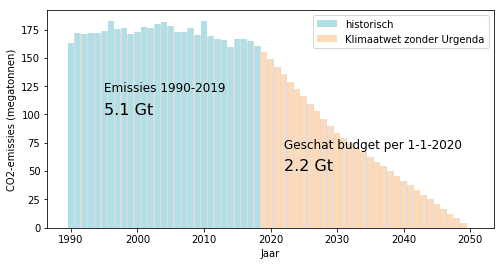

In [533]:
plt.figure(figsize=(8,4))

def plot_bar(x, y, color, label=None):
    # Helper function to add grey shading on background
    plt.bar(x, y, width=1, color=c_dict['edge'])
    plt.bar(x, y, label=label, color=color)

plot_bar(df_co2_NL.index, df_co2_NL, color=c_dict['hist'], label='historisch')
    
plot_bar(df_beleid.index, df_beleid, label='Klimaatwet '+urgenda_str, color=c_dict['future'])   

plt.xlabel('Jaar')
#plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.ylabel('CO2-emissies (megatonnen)')
plt.legend()

hist_sum = df_co2_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum =  df_beleid.sum() / 1e3
plt.text(2022,70,s=f'Geschat budget per 1-1-2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.savefig('figuur1_huidig.png',dpi=300)

Het verschil in koolstofbudget (2020-2050) met en zonder Urgenda in 2020 is klein: 1.9 Gt tegen 2.2 Gt.

# Deel 2 - Het nationale koolstofbudget van Nederland

Berekeningen geïnspireerd door Stefan Rahmstorf, in zijn blogpost [Wie viel CO2 kann Deutschland noch ausstoßen?](https://scilogs.spektrum.de/klimalounge/wie-viel-co2-kann-deutschland-noch-ausstossen/) op SciLogs. 

Eerst wat algemene variabelen uitrekenen.

In [324]:
inwoners_NL = 17.4e6 # 1-1-2019, https://en.wikipedia.org/wiki/Netherlands
inwoners_wereld = 7.8e9 # maart 2020, https://en.wikipedia.org/wiki/World_population

inwoners_NL_frac_wereld = inwoners_NL / inwoners_wereld 

print('Bevolking NL als percentage wereldbevolking: {:.2f} %'.format(inwoners_NL_frac_wereld*100))

Bevolking NL als percentage wereldbevolking: 0.22 %


## Berekening 1: Parijs 1,75 graad (66% kans)

*Dit is een interpretatie van de doelstelling "ruim onder 2 graden" uit het Klimaatakkoord van Parijs.*

**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2. 
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs

Deze aannames zijn (deels) een interpretatie van het begrip **equity** uit het Akkoord van Parijs, ofwel 'de sterkste schouders dragen de zwaarste lasten'. Zoals reeds beschreven in de Introductie, de keuzes hierin zullen de uitkomst sterk beïnvloeden. Een 'uitdelen' van het koolstofbudget op een eerder op later moment bijvoorbeeld. 

In [502]:
budget_2018 = 800 * 1e9/1e6 # Gt naar Mton, begin 2018
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 880000 Mton


In [503]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 1963 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [504]:
budget_NL_2020 = budget_NL_2016 - df_co2_NL[[2016,2017,2018,2019]].sum()
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 1316 Mton


Gegeven het budget, bereken de tijd die nodig is om de emissies lineair naar nul te brengen.

In [505]:
def bereken_emissiereductie_lineair(budget, startjaar, emissies_startjaar):
    """
    Gegeven een bepaald koolstofbudget en startjaar, bepaal de lineaire curve 
    in toekomstige emissies die hier minstens nog aan voldoet. 
    
    UITVOER
        De functie geeft een pandas 'Series' object terug; de emissies in het laatste 
        jaar van deze Series zijn nul. Het eerste jaar is het gegeven startjaar. 
    """
    frac = 2 * budget / emissies_startjaar
    jaren_tot_nul = np.int(frac)
    df = pd.Series(index=np.arange(startjaar,startjaar+jaren_tot_nul))
    df[startjaar] = emissies_startjaar; df[df.index[-1]] = 0
    df_out = df.interpolate()
    if (startjaar < 2020):
        print(f'LET OP: startjaar {startjaar} ligt in het verleden, subsetting mogelijk nodig.')
        print('')
    return df_out 

NB. Door de expliciete afronding in het aantal jaren (in de functie hierboven) is het budget onder de lineaire curve altijd iets minder dan het initiele budget. Echter deze afwijking is te verwaarlozen gezien de overige verschillen en onzekerheben. 

In [506]:
URGENDA = 0

if (URGENDA):
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020, startjaar=2020, emissies_startjaar=emis_Urgenda)
    df_1p75_lin = foo

else:
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020+df_co2_NL[2019], startjaar=2019, emissies_startjaar=df_co2_NL[2019])
    df_1p75_lin = foo.loc[2020:]
    
    
print(f'Jaar nul emissies: {df_1p75_lin.index[-1]}, budget totaal: {df_1p75_lin.sum():.0f} Mton, restant {budget_NL_2020-df_1p75_lin.sum():.0f} Mton')

LET OP: startjaar 2019 ligt in het verleden, subsetting mogelijk nodig.

Jaar nul emissies: 2036, budget totaal: 1242 Mton, restant 74 Mton


## Figuur

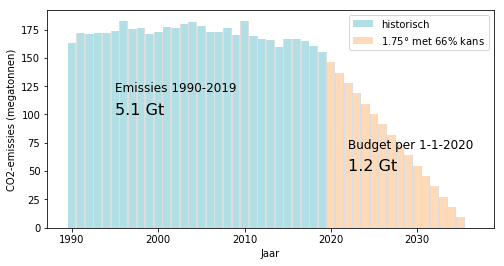

In [507]:
plt.figure(figsize=(8,4))

plot_bar(df_co2_NL.index, df_co2_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p75_lin.index, df_1p75_lin, label='1.75$\degree$ met $66\%$ kans', color=c_dict['future'])

plt.xlabel('Jaar')
plt.ylabel('CO2-emissies (megatonnen)')
#plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.legend()

hist_sum = df_co2_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p75_lin.sum() / 1e3
plt.text(2022,70,s=f'Budget per 1-1-2020',fontdict={'fontsize':12})
plt.text(2022,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.savefig('figuur2_1p75.png',dpi=300)

Jaarlijkse emissie reductie als % van het jaar 2019 en 2020. 

In [510]:
def print_emissiereductie_jaarlijks(df_toekomst):
    perc = (df_toekomst[2020]-df_toekomst[2021]) / df_co2_NL[2019] * 100 
    print(f'Jaarlijkse emissie reductie: {perc:.1f} % t.o.v. peiljaar 2019')

    perc = (df_toekomst[2020]-df_toekomst[2021]) / df_toekomst[2020] * 100 
    print(f'Jaarlijkse emissie reductie: {perc:.1f} % t.o.v. peiljaar 2020')

In [517]:
print_emissiereductie_jaarlijks(df_1p75_lin)

Jaarlijkse emissie reductie: 5.9 % t.o.v. peiljaar 2019
Jaarlijkse emissie reductie: 6.3 % t.o.v. peiljaar 2020


## Berekening 2: Parijs 1,5 graad (66% kans)

*waarbij ook rekening wordt gehouden met terugkoppelingen in het aardsysteem (Earth System Feedbacks). <br>
Dit is de eis van Fridays For Future in hun open brief [Face The Climate Emergency](https://climateemergencyeu.org/).<br>
Onder de mede-ondertekenaars bevinden zich ook vele wetenschappers, waaronder Stefan Rahmstorf en Volker Quaschning van Scientists For Future.*


**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2.
* Volgens dezelfde tabel: Earth System Feedbacks: reduce budgets by ~100 Gt
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs

In [491]:
budget_2018 = 420 * 1e3 # Mton, begin 2018
correctie_feedbacks = -100 * 1e3 # Earth System Feedbacks
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016 + correctie_feedbacks

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 400000 Mton


In [492]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 892 Mton


Sinds het peiljaar 2016 zijn we 4 jaren verder met weinig mitigatie. Het budget per 1.1.2020 is geslonken tot

In [493]:
budget_NL_2020 = budget_NL_2016 - df_co2_NL[[2016,2017,2018,2019]].sum()

#budget_NL_2020 = (budget_2016 - 160e3 ) * inwoners_NL_frac_wereld # Alternatief: taart verdelen vanaf 1.1.2020
print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 245 Mton


In [494]:
URGENDA = 0

if (URGENDA):
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020, startjaar=2020, emissies_startjaar=emis_Urgenda)
    df_1p50_lin = foo

else:
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020+df_co2_NL[2019], startjaar=2019, emissies_startjaar=df_co2_NL[2019])
    df_1p50_lin = foo.loc[2020:]

print(f'Jaar nul emissies: {df_1p50_lin.index[-1]}, budget totaal: {df_1p50_lin.sum():.0f} Mton, restant {budget_NL_2020-df_1p50_lin.sum():.0f} Mton')

LET OP: startjaar 2019 ligt in het verleden, subsetting mogelijk nodig.

Jaar nul emissies: 2023, budget totaal: 233 Mton, restant 12 Mton


Beetje Pandas magic om de lineaire reductie om te zetten in een emissie-waarde per jaar: 

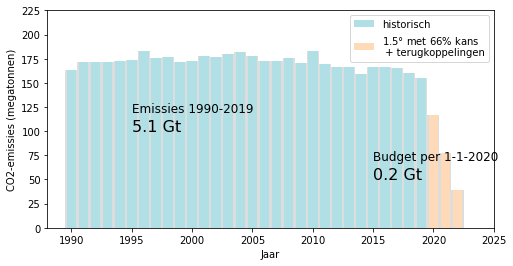

In [497]:
plt.figure(figsize=(8,4))

plot_bar(df_co2_NL.index, df_co2_NL, label='historisch', color=c_dict['hist'])
plot_bar(df_1p50_lin.index, df_1p50_lin, label='1.5$\degree$ met $66\%$ kans\n + terugkoppelingen', color=c_dict['future'])

plt.xlabel('Jaar')
#plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.ylabel('CO2-emissies (megatonnen)')
plt.legend()

hist_sum = df_co2_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p50_lin.sum() / 1e3
plt.text(2015,70,s=f'Budget per 1-1-2020',fontdict={'fontsize':12})
plt.text(2015,50,s=f'{future_sum:.1f} Gt',fontdict={'fontsize':16})

plt.xlim((1988, 2025))
plt.ylim((0,225))
plt.savefig('figuur3_1p50.png',dpi=300)

## Berekening 3: Parijs 1,5 graad (50% kans)

*een risico-voller scenario dan hierboven, met een kleinere kans en zonder rekening te houden  met terugkoppelingen in het aardsysteem. <br>
Verder is het tijdstip van verdeling verplaatst van 1.1.2016 naar 1.1.2020 wat (veel) gunstiger is voor Nederland (minder gunstig voor ontwikkelingslanden). *


**Aannames**
* Mondiale koolstofbudget uit: IPCC SR15, tabel 2.2.
* Het koolstofbudget voor Nederland is evenredig met haar bevolking
* Het koolstofbudget wordt "uitgedeeld" per 1.1.2016, kort na het Akkoord van van Parijs
* Het Urgenda-vonnis wordt gehaald, waarmee de emissies in 2020 uitkomen op 166,2 Mton


In [477]:
budget_2018 = 580 * 1e3 # Mton, begin 2018
correctie_2016 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar

budget_2016 = budget_2018 + correctie_2016

print(f'Koolstofbudget wereld per 1.1.2016: {budget_2016:.0f} Mton')

Koolstofbudget wereld per 1.1.2016: 660000 Mton


In [478]:
budget_NL_2016 = inwoners_NL_frac_wereld * budget_2016
print(f'Koolstofbudget NL per 1.1.2016: {budget_NL_2016:.0f} Mton')

Koolstofbudget NL per 1.1.2016: 1472 Mton


In [479]:
budget_NL_2020 = budget_NL_2016 - df_co2_NL[[2016,2017,2018,2019]].sum()

print(f'Koolstofbudget NL per 1.1.2020: {budget_NL_2020:.0f} Mton')

Koolstofbudget NL per 1.1.2020: 825 Mton


### Verdeling 1.1.2016

In [480]:
URGENDA = 0

if (URGENDA):
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020, startjaar=2020, emissies_startjaar=emis_Urgenda)
    df_1p50_lin2 = foo

else:
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020+df_co2_NL[2019], startjaar=2019, emissies_startjaar=df_co2_NL[2019])
    df_1p50_lin2 = foo.loc[2020:]

print(f'Jaar nul emissies: {df_1p50_lin2.index[-1]}, budget totaal: {df_1p50_lin2.sum():.0f} Mton, restant {budget_NL_2020-df_1p50_lin2.sum():.0f} Mton')

LET OP: startjaar 2019 ligt in het verleden, subsetting mogelijk nodig.

Jaar nul emissies: 2030, budget totaal: 776 Mton, restant 49 Mton


### Een gunstiger alternatief: taart verdelen per 1.1.2020

In [481]:
correctie_2020 = 80  *  1e9/1e6 # mondiale uitstoot ca. 40 Gt per jaar
budget_2020 = budget_2018 - correctie_2020 # aftrekken , niet optellen
budget_NL_2020 = inwoners_NL_frac_wereld * budget_2020

if (URGENDA):
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020, startjaar=2020, emissies_startjaar=emis_Urgenda)
    df_1p50_lin3 = foo

else:
    foo = bereken_emissiereductie_lineair(budget=budget_NL_2020+df_co2_NL[2019], startjaar=2019, emissies_startjaar=df_co2_NL[2019])
    df_1p50_lin3 = foo.loc[2020:]
    
print(f'Jaar nul emissies: {df_1p50_lin3.index[-1]}, budget totaal: {df_1p50_lin3.sum():.0f} Mton, restant {budget_NL_2020-df_1p50_lin3.sum():.0f} Mton')

LET OP: startjaar 2019 ligt in het verleden, subsetting mogelijk nodig.

Jaar nul emissies: 2034, budget totaal: 1087 Mton, restant 29 Mton


### Figuur

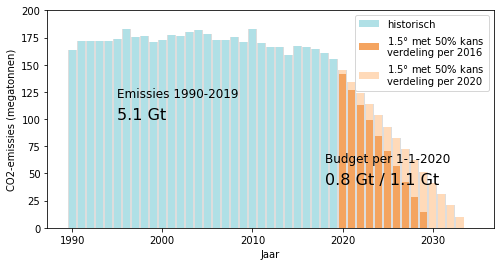

In [499]:
plt.figure(figsize=(8,4))

plot_bar(df_co2_NL.index, df_co2_NL, label='historisch', color=c_dict['hist'])

plot_bar(df_1p50_lin3.index, df_1p50_lin3, label='1.5$\degree$ met $50\%$ kans\nverdeling per 2020', color=c_dict['future'])
plot_bar(df_1p50_lin2.index, df_1p50_lin2, label='1.5$\degree$ met $50\%$ kans\nverdeling per 2016', color=c_dict['future2'])

plt.xlabel('Jaar')
#plt.ylabel('Totaal emissies (Mton CO2-eq)')
plt.ylabel('CO2-emissies (megatonnen)')

hist_sum = df_co2_NL.sum() / 1e3 # Gt
plt.text(1995,120,s=f'Emissies 1990-2019',fontdict={'fontsize':12})
plt.text(1995,100,s=f'{hist_sum:.1f} Gt',fontdict={'fontsize':16})

future_sum = df_1p50_lin2.sum() / 1e3
future_sum2 = df_1p50_lin3.sum() / 1e3
plt.text(2018,60,s=f'Budget per 1-1-2020',fontdict={'fontsize':12})
plt.text(2018,40,s=f'{future_sum:.1f} Gt / {future_sum2:.1f} Gt ',fontdict={'fontsize':16})

#plt.xlim((1990, 2040))
plt.ylim((0, 200))

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
myorder = [0,2,1]
handles = [handles[i] for i in myorder]
labels = [labels[i] for i in myorder]
ax.legend(handles, labels)

plt.savefig('figuur4_1p50.png',dpi=300)

### Jaarlijkse emissiereducties

In [520]:
print('1.75 graad met 66% kans')
print_emissiereductie_jaarlijks(df_1p75_lin)

print('')
print('1.5 graad met 50% kans, verdeling 1.1.2020')
print_emissiereductie_jaarlijks(df_1p50_lin3)

print('')
print('1.5 graad met 50% kans, verdeling 1.1.2016')
print_emissiereductie_jaarlijks(df_1p50_lin2)

print('')
print('1.5 graad met 66% kans + feedback')
print_emissiereductie_jaarlijks(df_1p50_lin)


1.75 graad met 66% kans
Jaarlijkse emissie reductie: 5.9 % t.o.v. peiljaar 2019
Jaarlijkse emissie reductie: 6.3 % t.o.v. peiljaar 2020

1.5 graad met 50% kans, verdeling 1.1.2020
Jaarlijkse emissie reductie: 6.7 % t.o.v. peiljaar 2019
Jaarlijkse emissie reductie: 7.1 % t.o.v. peiljaar 2020

1.5 graad met 50% kans, verdeling 1.1.2016
Jaarlijkse emissie reductie: 9.1 % t.o.v. peiljaar 2019
Jaarlijkse emissie reductie: 10.0 % t.o.v. peiljaar 2020

1.5 graad met 66% kans + feedback
Jaarlijkse emissie reductie: 25.0 % t.o.v. peiljaar 2019
Jaarlijkse emissie reductie: 33.3 % t.o.v. peiljaar 2020


# Naschrift

In november 2018 schreef een klimaatexpert van het Planbureau voor de Leefomgeving (dr. [Detlef van Vuuren](https://www.pbl.nl/en/about-pbl/employees/detlef-van-vuuren)) een doorwrocht artikel getiteld [Wat betekent het Akkoord van Parijs voor het Nederlandse langetermijnklimaatbeleid?](https://esb.nu/kvs/20046705/wat-betekent-het-akkoord-van-parijs-voor-het-nederlandse-langetermijnklimaatbeleid). Hieronder enkele interessante passages uit dit artikel, waarvan sommige onze bovenstaande analyse ondersteunen, zoals de keuze voor de verdeling 'per capita'. 


**Over het huidige beleid**

> Roelfsema et al. (2017) hebben een uitvoerige analyse gemaakt van het effect van alle plannen die landen hebben ingediend voor de mondiale emissies in 2025 en 2030 (figuur 2, referentiescenario). Als wordt aangenomen dat landen dit beleid na 2030 zullen gaan voortzetten, dan blijkt dat zowel de uitvoering van de NDC’s als de voorzetting van dat beleid absoluut onvoldoende is om het doel van 2 graden te halen. Uitgaande van het doel van 1,5 à 2 °C is het dus noodzakelijk om de huidige plannen voor 2030 aan te scherpen.

**Over rechtvaardigheid**

> Het ligt voor de hand te veronderstellen dat – zowel nationaal als internationaal –kostenefficiëntie niet alleen als argument in de discussie rond het aanscherpen van de nationale doelstellingen wordt gebruik, maar ook rechtvaardigheid. Qua kosten is het aantrekkelijk om veel maatregelen te nemen in ontwikkelingslanden, aangezien reducties daar vaak goedkoper zijn dan in rijke landen. Maar efficiëntie is dus niet het enige criterium – draagkracht, gelijkheid en verantwoordelijkheid (bijvoorbeeld voor historische klimaat­verandering) spelen ook een belangrijke rol.

en 

> In de wetenschappelijke literatuur lijkt zich een consensus te ontwikkelen dat op de lange termijn een geleidelijke convergentie naar gelijke emissies per hoofd voor de hand ligt. Zo’n ‘per capita convergentie’ ligt qua resultaten ook meestal in het midden van de range van uitkomsten van de verschillende rechtvaardigheidsprincipes en geeft voor veel landen (maar zeker niet voor alle) ook een redelijke verdeling van kosten per eenheid bnp (Hof et al., 2009; Van den Berg et al., 2017).

**Over de interpreteerbaarheid**
> Er gelden nu dus enkele belangrijke keuzes als men tot een interpretatie van Parijs wil komen wat betreft de toe­gestane CO2-emissies. Ten eerste is er het doel zelf: is het ruim onder de 2 °C of maximaal 1,5 °C? Ten tweede is er de vraag met welke zekerheid er aan deze doelen moet ­worden voldaan. Is twee derde kans voldoende? (...) En tenslotte speelt er ook nog de timing van de emissiereductie.


**Over negatieve emissies**

> Bijna alle scenario’s van het VN-klimaatpanel en de wetenschappelijke literatuur veronderstellen negatieve emissies in de toekomst (Van Vuuren et al., 2015). Dit geldt dus ook voor de afgeleide emissiedoelen, die immers op deze literatuur en scenario’s gebaseerd zijn. Negatieve emissies kunnen echter niet onbeperkt worden ingezet. De bovengenoemde technieken staan nog in de kinderschoenen, zijn soms duur, en leiden vaak tot meer energie­gebruik (Strengers et al., 2018). CO2-afvang leidt bijvoorbeeld tot een lagere efficiëntie van elektriciteits­centrales, en versnelde verwering vereist energie om gesteente te vermalen. Voor de vaakst overwogen methoden – dat wil zeggen bio-energie met CCS en herbebossing– geldt dat deze landintensief zijn, en daarmee negatieve gevolgen kunnen hebben voor de voedselvoorziening en biodiversiteit (Smith et al., 2016). Ten slotte is de opslagcapaciteit van CO2 beperkt. Om deze reden dringt de vraag zich op of ­scenario’s met veel negatieve emissies wel reëel zijn (Anderson en Peters, 2016; Smith et al., 2016).

**Over de urgentie**

> De komende tien jaar zijn, zowel wereldwijd als in Nederland, cruciaal om de klimaatverandering te laten voldoen aan de doelstellingen van het Akkoord van Parijs. Hiervoor is het op korte termijn nodig om een breuk met het verleden te bewerkstelligen, en de emissies sneller te reduceren. Het vaststaande en voorgenomen beleid in Nederland leidt nog niet tot een reductie overeenkomstig de Parijse doelen.